<a href="https://colab.research.google.com/github/mrneerajnegi/Data-Science-Projects/blob/Dog-Bread-Prediction/Dog_Breed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import files to upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neerajnegii","key":"2e5c4c4e622aaa0e830c5a66ee8fa43b"}'}

In [4]:
#install kaggle
!pip install -q kaggle

In [5]:
#make kaggle folder
!mkdir ~/.kaggle
#!rm -rf /root/.kaggle

In [6]:
#copy json file to that folder
!cp kaggle.json ~/.kaggle/

In [7]:
#to avaid  permission issues
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
#make datasetfolder
!mkdir dog_dataset

In [9]:
#enter in it
%cd dog_dataset

/content/dog_dataset


In [10]:
#download the dataset from kaggle
!kaggle datasets download catherinehorng/dogbreedidfromcomp

 97% 671M/691M [00:04<00:00, 176MB/s]
100% 691M/691M [00:05<00:00, 144MB/s]


In [ ]:
#unzip it
!unzip dogbreedidfromcomp.zip -d dog_dataset

In [12]:
#remove the extra files
!rm dog_dataset/sample_submission.csv

In [13]:
#remove zip file
!rm dogbreedidfromcomp.zip

In [14]:
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D
import pandas as pd
import numpy as np
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
from PIL import Image
from sklearn.preprocessing import label_binarize

In [15]:
labels=pd.read_csv("./dog_dataset/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [16]:
labels["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [17]:
#lets add 3 classes due to limitations of computational power
CLASSES_NAME=["scottish_deerhound","maltese_dog","bernese_mountain_dog"]
labels=labels[labels["breed"].isin(CLASSES_NAME)]

In [18]:
labels["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
bernese_mountain_dog    114
Name: breed, dtype: int64

In [19]:
labels=labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [20]:
training_x=np.zeros(shape=(len(labels),224,224,3))
for i in tqdm(range(len(labels))):  #tqdm is to show the loading
  img=Image.open(f"./dog_dataset/train/{labels['id'][i]}.jpg")
  img=img.resize((224,224)) 
  training_x[i]=img
print(training_x.shape)

100%|██████████| 357/357 [00:08<00:00, 40.98it/s]

(357, 224, 224, 3)


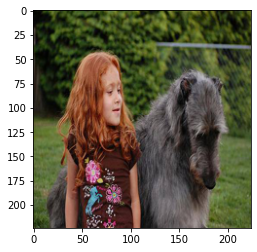

In [21]:
plt.imshow(training_x[0].astype("uint8"))

In [22]:
training_y=label_binarize(labels["breed"],classes=CLASSES_NAME)
training_y

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [23]:
xtrain_val,xtest,ytrain_val,ytest=train_test_split(training_x,training_y,test_size=0.1)

In [24]:
xtrain,xval,ytrain,yval=train_test_split(xtrain_val,ytrain_val,test_size=0.1)

In [25]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(64,activation="relu",))
model.add(Dense(32,activation="relu",))
model.add(Dense(3,activation="softmax",))
model.compile(loss="categorical_crossentropy",optimizer=Adam(0.0001),metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0

In [43]:
history=model.fit(xtrain,ytrain,validation_data=(xval,yval),epochs=50,batch_size=32,)

Epoch 1/50
9/9 [==============================] - 18s 2s/step - loss: 0.5727 - accuracy: 0.7847 - val_loss: 0.7411 - val_accuracy: 0.6667
Epoch 2/50
9/9 [==============================] - 18s 2s/step - loss: 0.5594 - accuracy: 0.7917 - val_loss: 0.7910 - val_accuracy: 0.5758
Epoch 3/50
9/9 [==============================] - 17s 2s/step - loss: 0.5371 - accuracy: 0.7951 - val_loss: 0.7179 - val_accuracy: 0.6667
Epoch 4/50
9/9 [==============================] - 17s 2s/step - loss: 0.5108 - accuracy: 0.8403 - val_loss: 0.7227 - val_accuracy: 0.6667
Epoch 5/50
9/9 [==============================] - 17s 2s/step - loss: 0.4997 - accuracy: 0.8056 - val_loss: 0.6834 - val_accuracy: 0.6667
Epoch 6/50
9/9 [==============================] - 17s 2s/step - loss: 0.4770 - accuracy: 0.8507 - val_loss: 0.7209 - val_accuracy: 0.6667
Epoch 7/50
9/9 [==============================] - 17s 2s/step - loss: 0.4864 - accuracy: 0.8160 - val_loss: 0.6964 - val_accuracy: 0.6970
Epoch 8/50
9/9 [==================

In [44]:
model.evaluate(xtest,ytest)

2/2 [==============================] - 1s 69ms/step - loss: 0.9405 - accuracy: 0.6944


[0.9404749274253845, 0.6944444179534912]

In [45]:
results=pd.DataFrame(history.history,columns=history.history.keys())

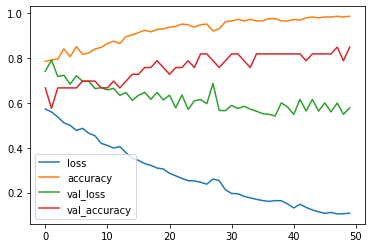

In [46]:
results.plot()

In [52]:
predicted=model.predict(np.expand_dims(xtest[1],axis=0))

In [53]:
CLASSES_NAME[predicted.argmax()]

'maltese_dog'

In [51]:
CLASSES_NAME[ytest[1].argmax()]

'maltese_dog'